# Final Project: Investitage a Dataset

## Introduction & Question

The tragedy of the [Titanic](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic) is known to most people. In this project, we attained a dataset which contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. The source of the data and the cookbook can be found on [Kaggle](https://www.kaggle.com/c/titanic/data). We follow Udacity's suggestions and investigate the following question:

"What factors made people more likely to survive?"

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset into a dataframe 
df = pd.read_csv("titanic-data.csv")

Now let's get some quick overview about the variables and the structure of our dataframe. We'll also have a quick peek into the first entries.

In [3]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


So we have 891 entries with 12 columns. For `Age` and especially `Cabin` some values are missing. Our *dependent variable*, `Survived`, might only assume 0(not survived) and 1(survived). Other variables that might need explanation:

`Pclass`: Proxy Class. Socio-economically categorizing the passenger into three different classes.

`SibSp`: Number of siblings / spouses aboard the Titanic

`Parch`: Number of parents / children aboard the Titanic

`Embarked`: Port of Embarkation

# Data Analysis

Now, let's see how many people have survived:

0.3838383838383838

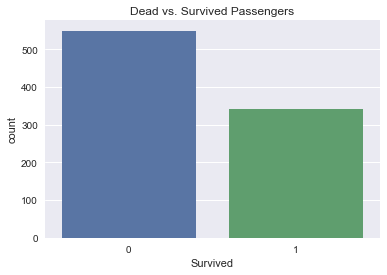

In [4]:
# Before any analysis with df:
# Drop columns not neccessary for this notebook
df = df.drop(["Name", "Ticket"], axis=1)

sns.countplot(x="Survived", data=df).set_title('Dead vs. Survived Passengers')
np.mean(df['Survived'])

The majority of the passengers didn't survive as seen from the chart. To be more precise, only 38.4% of all passengers survived.
Now let's see if the saying "women and children first" was also true for the sinking of titanic. In other words, was their surving ratio above 38.4% and above men, respectively?

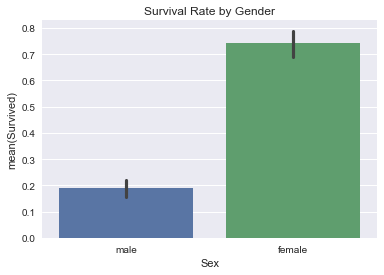

In [5]:
sns.barplot(x="Sex", y="Survived", data=df).set_title('Survival Rate by Gender');

Indeed, the saying proved true in this case. The survival rate of was nearly four times higher than for men. Now, to children.
As seen above not all of the 891 observations have Age value. Let's double check:

In [6]:
print(df["Age"].isnull().sum())

177


So before we continue, let's get rid of all rows without any Age value.

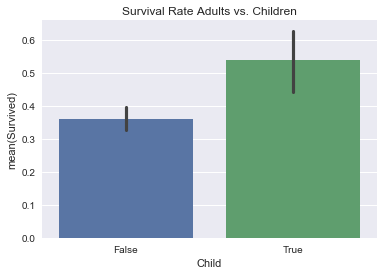

In [7]:
df_withAgeValue = df.dropna(subset = ['Age'])

#duplicate df
df_withAgeValue = df
#add a new column "Child" to a new df with values TRUE and FALSE
df_withAgeValue['Child'] = df_withAgeValue['Age'] < 18
sns.barplot(x="Child", y="Survived",
            data=df_withAgeValue).set_title('Survival Rate Adults vs. Children');

Indeed, children's chances were higher to survive – almost 50% more. What if we define child younger, because maybe some of the 17 and 18 year old already looked very mature and in the chaotic situation they didn't receive the help of the older passengers.

In [8]:
df_withAgeValue['Child'] = df_withAgeValue['Age'] < 16

The survival rate for both went up, but more for children. Let's keep it the narrower definition for children. 
What if we combine our two factors, i.e. differentiate between sex and age.

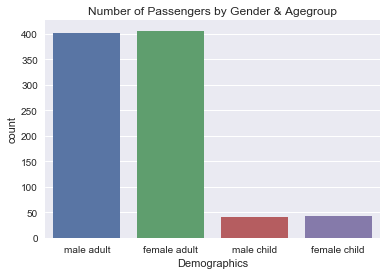

In [9]:
# splits passengers into 4 categories defined by age and sex
def minorOrAdult(passenger):
 age, sex = passenger

 if age < 16 and sex == "female":
     return 'female child'
 elif age < 16 and sex == "male":
     return 'male child'
 elif age > 16 and sex == "male":
     return 'male adult'
 else:
    return 'female adult'
df_withAgeValue['Demographics'] = df_withAgeValue[['Age', 'Sex']].apply(minorOrAdult, axis=1)

sns.countplot(x="Demographics", 
              data=df_withAgeValue).set_title("Number of Passengers by Gender & Agegroup");

There were roughly 9 times more adults than children on board. Gender equally splits adults and children.

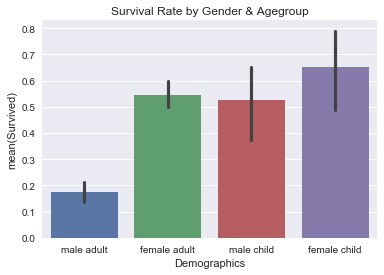

In [10]:
sns.barplot(x="Demographics", 
            y="Survived", data=df_withAgeValue).set_title("Survival Rate by Gender & Agegroup");

Now this is interesting. The survival rate for male adults was merely between 15% to 20%! The other three groups are all above 50%. It's interesting to see that a female adult had a slightly higher chance to surve than a male child. The combination of being female and a child was obviously the best.
The last and third variable we're going to explore is the Passengers' Class. Naturally, one would assume that passengers from the "higher echelons" were given resue boats first.

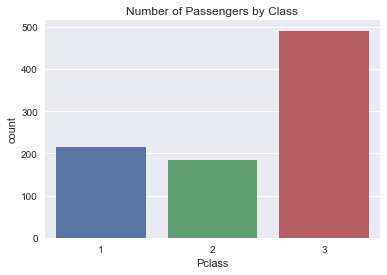

In [11]:
sns.countplot(x="Pclass", 
              data=df_withAgeValue).set_title("Number of Passengers by Class");

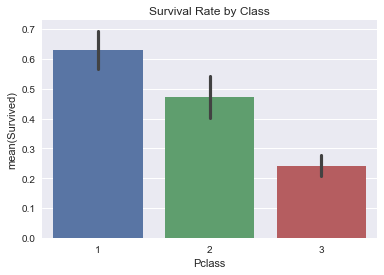

In [12]:
sns.barplot(x="Pclass", 
            y="Survived", data=df_withAgeValue).set_title("Survival Rate by Class");

In [13]:
np.average(df['Survived'], weights =(df['Pclass'] == 1)) \
/ np.average(df['Survived'], weights =(df['Pclass'] == 3))

2.5978835978835981

One last idea would be to combine all three variables to see if get new insights.

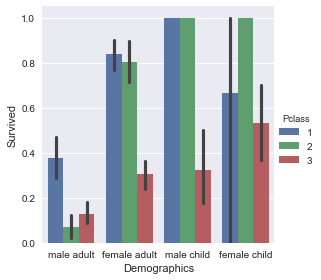

In [14]:
sns.factorplot(x="Demographics", y="Survived", hue="Pclass", data=df_withAgeValue, kind="bar");

This graph didn't quite work out as there's not enough data for children. However, one thing which immediately pops out is the low survival rate of second and third class male passengers. Counterintuitively, the  survival rate for second class male passengers is lower than for third class male passengers. The rate of second class male passengers is so low, that these poor passengers barely had a chance to survive.

# Conclusion

I enjoyed the dataset. Most findings were intuitive. Counterintuitive to me were that male children had a lower survival rate than adult women and that second class male passengers had a lower survival rate than third class male passengers.
Further investigation is necessary to see if these counterintuitive findings have to do with the cabin of the passengers.
Some caveats: These findings are observational data and thus merely show correlations. Our findings don’t imply any causal effects as we haven’t conducted any experiments. Besides, our data was just a sample and not the entire population. We don't know how the sample was chosen from the actual population of people that were on the Titanic. 